In [1]:
#import csv
#from datetime import datetime
import matplotlib.pyplot as plt
#import matplotlib
import numpy as np
import sklearn
#import scipy
#import random
from sklearn.cluster import DBSCAN
#import math
from scipy.spatial import distance

In [2]:
### Function to save results as .txt files
import pickle
def pick(file, name):
    with open('./ira_txt_1/' + name + '.txt', "wb") as fp:   #Pickling
        pickle.dump(file, fp)
def unpick(name):
    with open('./ira_txt_1/' + name + '.txt', "rb") as fp:   # Unpickling
        file = pickle.load(fp)
    return file

In [3]:
bin_data_m = unpick('bin_data_matrix')

In [4]:
debot = unpick('debot_0.99')
not_debot = list ( set(range(3667)) - set(debot) )

In [5]:
total_users = 3667
total_tweets = 9041308
total_days = 3331

In [6]:
data = bin_data_m[not_debot]

In [7]:
dist_j = sklearn.metrics.pairwise_distances(data, metric='jaccard')

C:\Users\macki\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [8]:
def duplicate(testList, n):
    for _ in range(n):
        testList.append([])
    return testList

def list_cls(labs):
    cl = duplicate([],max(labs) + 1)
    for i in range(len(labs)):
        cl[labs[i]].append(i)
    return cl

In [9]:
### Perfrom DBSCAN clustering
def cluster(dist, ep, ms):
    clustering = DBSCAN(eps=ep, min_samples=ms, metric='precomputed').fit(dist)
    L = clustering.labels_
    return L

def silhouette(L, dist):
    avg = sklearn.metrics.silhouette_score(dist, L, metric='precomputed')
    ary = sklearn.metrics.silhouette_samples(dist, L, metric='precomputed')
    for i in range(len(L)):
        if L[i] == -1: ary[i] = 0
    adjusted = np.mean(ary)
    raw = avg
    return raw, adjusted

def process_labels(ls):
    labs = np.array(ls) + 1
    clusters = np.max(labs)
    clusterNo, clusterS = np.unique(labs, return_counts=True)
    return clusters, clusterNo, clusterS

def score_clustering(ls, dist):
    raw, adjusted = silhouette(ls, dist)
    number, array, sizes = process_labels(ls)
    clustered = np.sum(sizes[1:number+1])
    unclustered = sizes[0]
    percent = clustered / ( clustered + unclustered )
    loc = list_cls(np.array(ls)+1)
    sizes = list(map(len, loc))
    sizes = np.array(sizes)
    avg_size = np.mean(sizes[1:])
    return adjusted, percent * 100, avg_size

In [11]:
best_eps = 0.2
best_min = 5

In [12]:
ls = cluster(dist_j, best_eps, best_min)
#ls = cluster(dist_j, 0.28, 10)
print(score_clustering(ls, dist_j))

labels = np.array(ls) + 1
index, size = np.unique(labels, return_counts=True)
print(size[1:].tolist())
print(np.sum(size[1:]))
print(size[0])
loc = list_cls(labels)
sizes = list(map(len, loc))
sizes = np.array(sizes)
print(np.mean(sizes[1:]))

(0.2976113065874298, 46.09375, 22.125)
[44, 422, 96, 67, 6, 17, 8, 35, 5, 36, 5, 29, 7, 6, 20, 11, 11, 15, 5, 9, 6, 15, 13, 6, 19, 8, 7, 46, 7, 24, 5, 7, 10, 10, 12, 7, 9, 5, 5, 5, 5, 5, 51, 12, 8, 5, 5, 10, 8, 13, 12, 5, 5, 5, 5, 5]
1239
1449
22.125


In [18]:
pick(loc, 'notbot_loc')
loc = unpick('notbot_loc')

In [20]:
print(loc[1])

[1, 20, 55, 66, 91, 104, 125, 193, 221, 265, 310, 330, 342, 368, 403, 462, 492, 568, 625, 649, 686, 695, 699, 740, 775, 796, 842, 852, 877, 914, 970, 980, 1003, 1019, 1030, 1164, 1538, 1604, 1684, 1739, 1779, 1789, 1791, 1934]


Size: 44 3331
Period: 1900 2100
Dif:  25


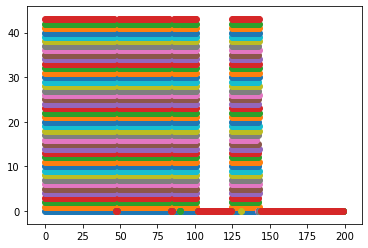

Size: 422 3331
Period: 1900 2100
Dif:  23066


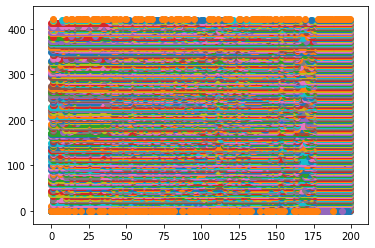

Size: 96 3331
Period: 1900 2100
Dif:  718


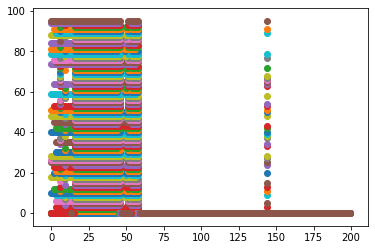

Size: 67 3331
Period: 1900 2100
Dif:  2079


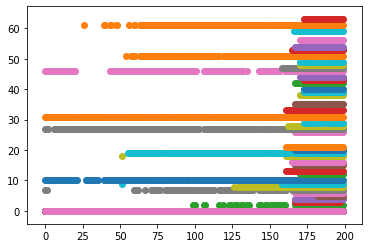

Size: 6 3331
Period: 1900 2100
Dif:  0


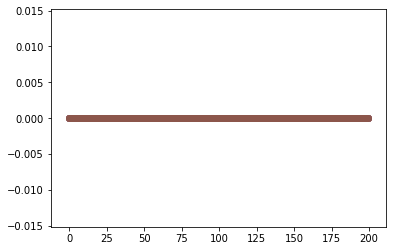

Size: 17 3331
Period: 1900 2100
Dif:  0


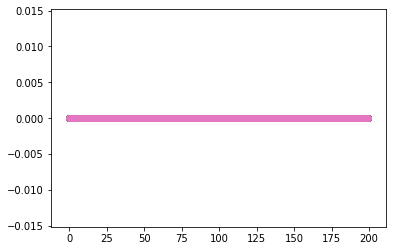

Size: 8 3331
Period: 1900 2100
Dif:  6


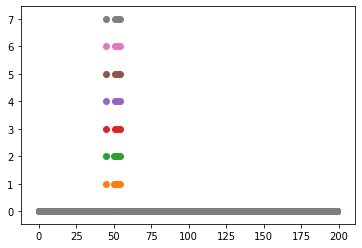

Size: 35 3331
Period: 1900 2100
Dif:  25


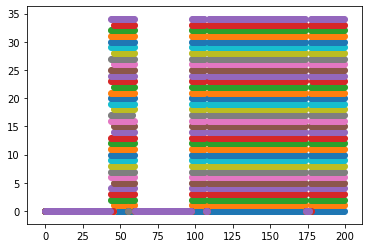

Size: 5 3331
Period: 1900 2100
Dif:  0


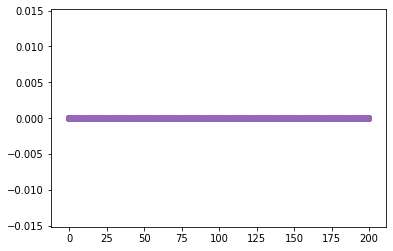

Size: 36 3331
Period: 1900 2100
Dif:  0


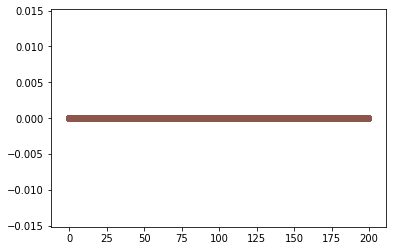

Size: 5 3331
Period: 1900 2100
Dif:  0


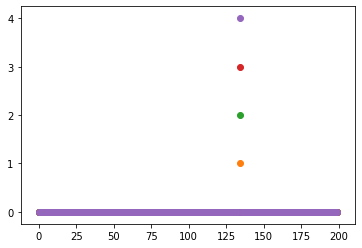

Size: 29 3331
Period: 1900 2100
Dif:  0


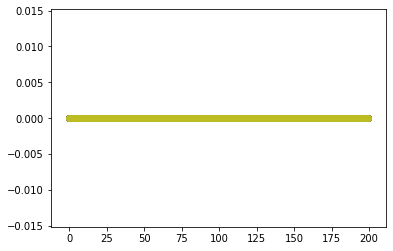

Size: 7 3331
Period: 1900 2100
Dif:  0


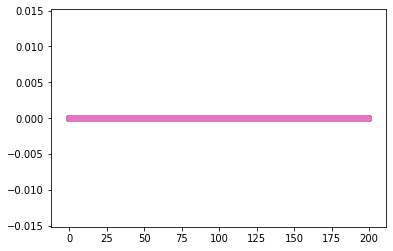

Size: 6 3331
Period: 1900 2100
Dif:  241


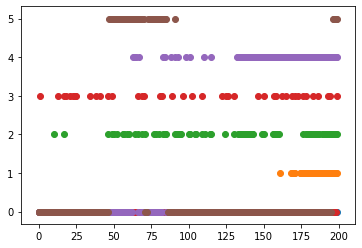

Size: 20 3331
Period: 1900 2100
Dif:  51


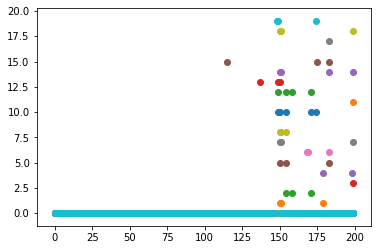

Size: 11 3331
Period: 1900 2100
Dif:  7


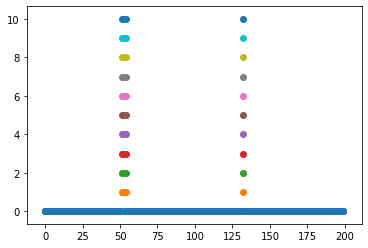

Size: 11 3331
Period: 1900 2100
Dif:  9


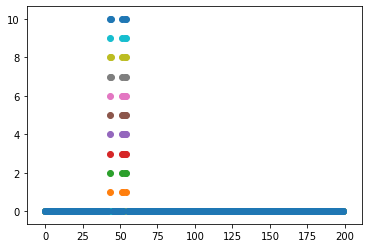

Size: 15 3331
Period: 1900 2100
Dif:  0


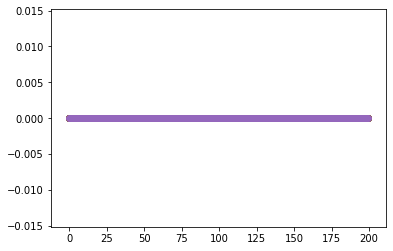

Size: 5 3331
Period: 1900 2100
Dif:  0


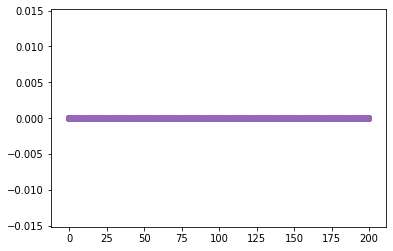

Size: 9 3331
Period: 1900 2100
Dif:  10


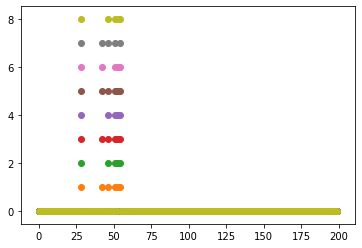

Size: 6 3331
Period: 1900 2100
Dif:  0


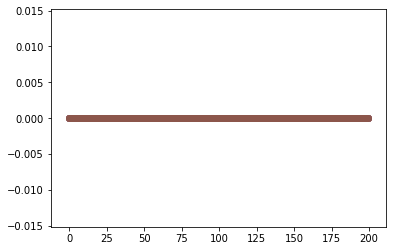

Size: 15 3331
Period: 1900 2100
Dif:  8


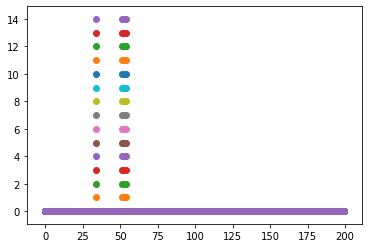

Size: 13 3331
Period: 1900 2100
Dif:  8


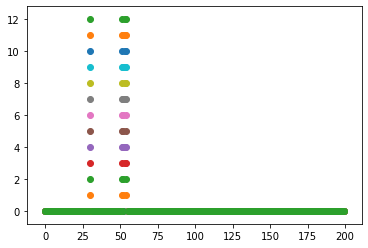

Size: 6 3331
Period: 1900 2100
Dif:  0


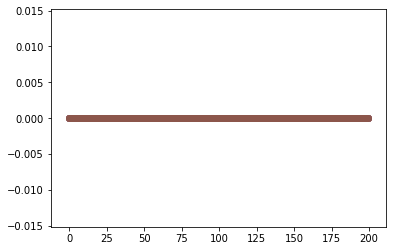

Size: 19 3331
Period: 1900 2100
Dif:  0


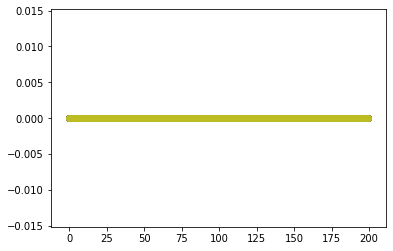

Size: 8 3331
Period: 1900 2100
Dif:  0


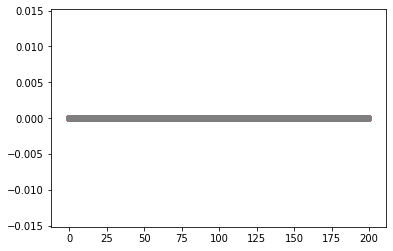

Size: 7 3331
Period: 1900 2100
Dif:  0


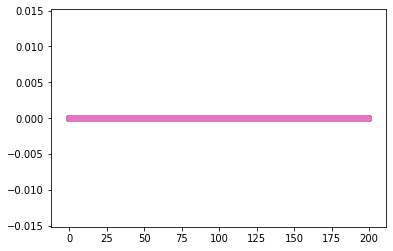

Size: 46 3331
Period: 1900 2100
Dif:  0


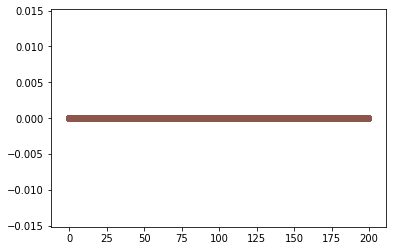

Size: 7 3331
Period: 1900 2100
Dif:  5


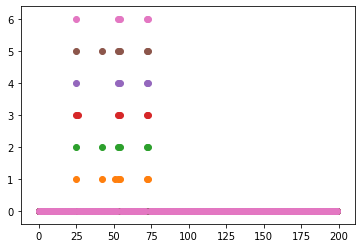

Size: 24 3331
Period: 1900 2100
Dif:  0


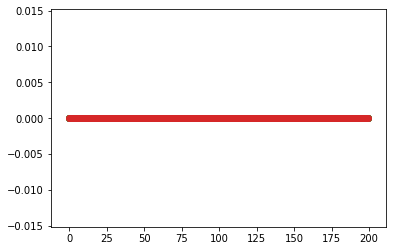

Size: 5 3331
Period: 1900 2100
Dif:  0


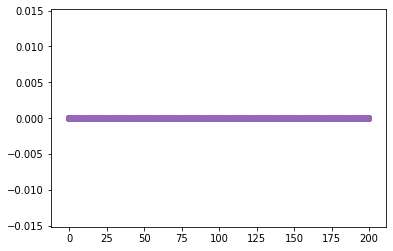

Size: 7 3331
Period: 1900 2100
Dif:  0


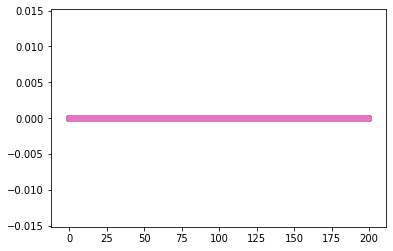

Size: 10 3331
Period: 1900 2100
Dif:  0


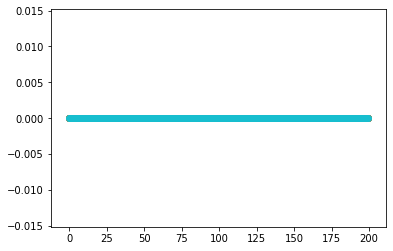

Size: 10 3331
Period: 1900 2100
Dif:  8


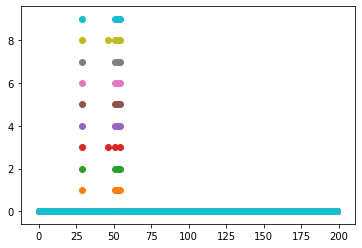

Size: 12 3331
Period: 1900 2100
Dif:  0


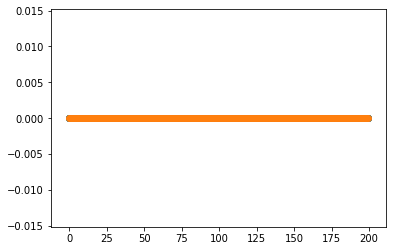

Size: 7 3331
Period: 1900 2100
Dif:  5


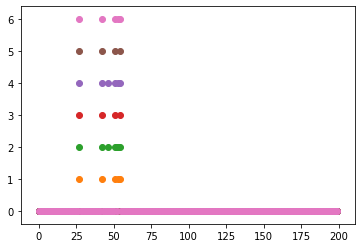

Size: 9 3331
Period: 1900 2100
Dif:  16


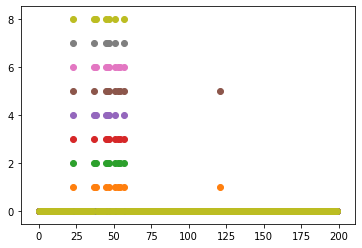

Size: 5 3331
Period: 1900 2100
Dif:  2


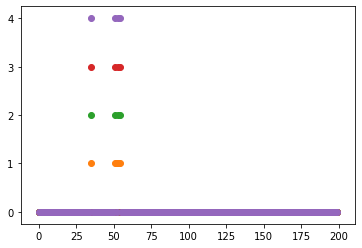

Size: 5 3331
Period: 1900 2100
Dif:  2


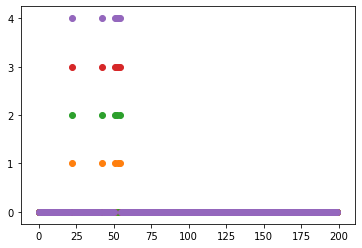

Size: 5 3331
Period: 1900 2100
Dif:  0


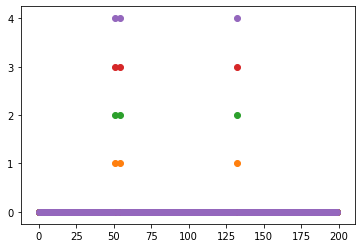

Size: 5 3331
Period: 1900 2100
Dif:  0


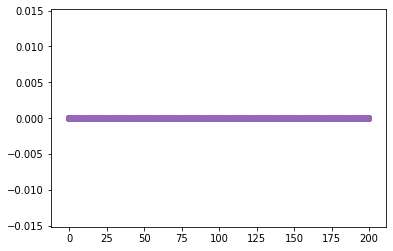

Size: 5 3331
Period: 1900 2100
Dif:  5


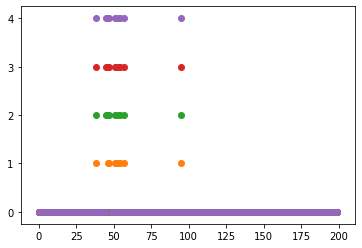

Size: 51 3331
Period: 1900 2100
Dif:  0


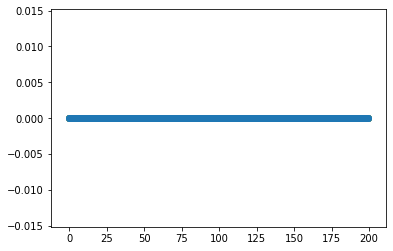

Size: 12 3331
Period: 1900 2100
Dif:  0


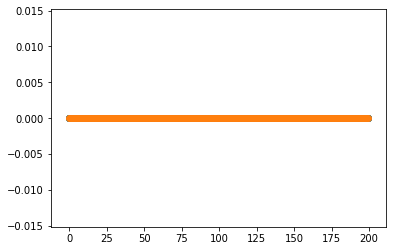

Size: 8 3331
Period: 1900 2100
Dif:  0


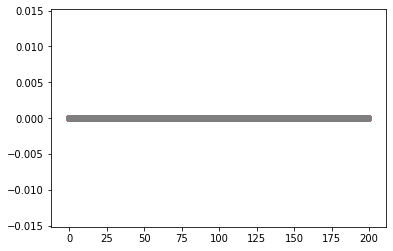

Size: 5 3331
Period: 1900 2100
Dif:  0


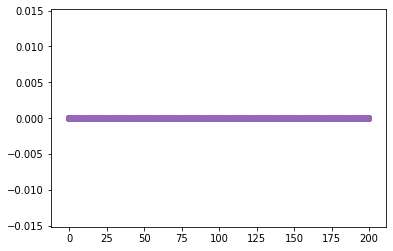

Size: 5 3331
Period: 1900 2100
Dif:  4


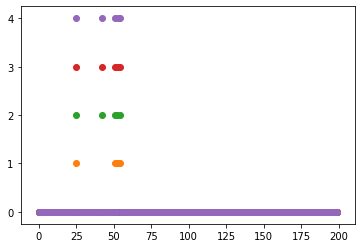

Size: 10 3331
Period: 1900 2100
Dif:  0


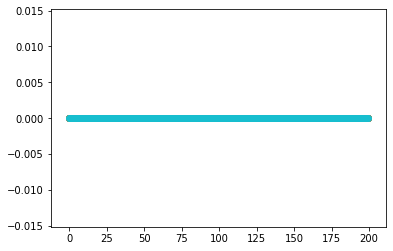

Size: 8 3331
Period: 1900 2100
Dif:  0


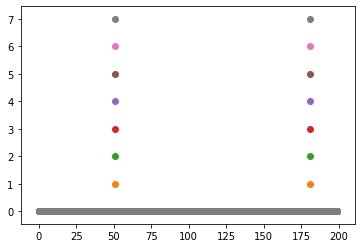

Size: 13 3331
Period: 1900 2100
Dif:  0


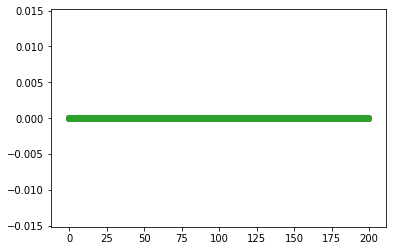

Size: 12 3331
Period: 1900 2100
Dif:  0


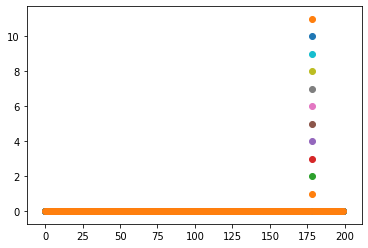

Size: 5 3331
Period: 1900 2100
Dif:  0


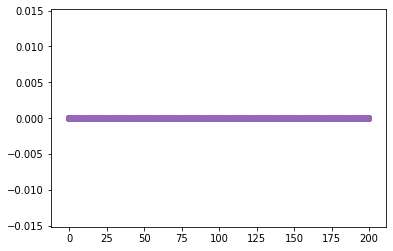

Size: 5 3331
Period: 1900 2100
Dif:  0


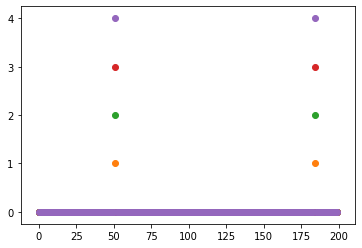

Size: 5 3331
Period: 1900 2100
Dif:  0


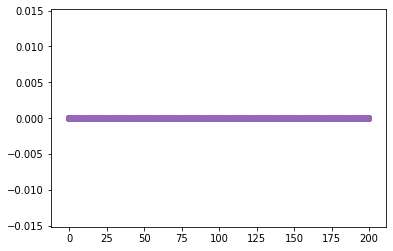

Size: 5 3331
Period: 1900 2100
Dif:  0


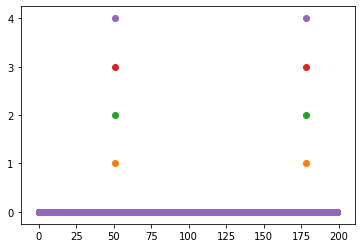

Size: 5 3331
Period: 1900 2100
Dif:  0


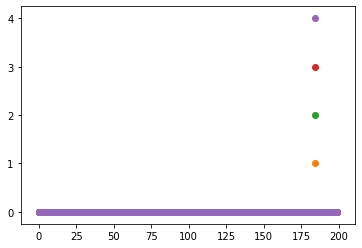

In [19]:
results = []

for j in range(len(loc) - 1):
    cl = loc[j + 1]
    cluster_data = data[cl]
    
    u, d = cluster_data.shape
    print('Size:',u,d)
    SUM = np.sum(cluster_data,0)
    
    max_day = np.argmax(SUM)
    fd, ld = max_day, max_day + 30
    
    fd = 1900
    ld = 2100
    
#    non = np.nonzero(SUM)
#    fd, ld = non[0][0], non[0][-1]

    print('Period:', fd,ld)
    
    dif = 0
    
    for i in range(ld - fd + 1):
        i += fd
        total = SUM[i]
#        print(total)
        if total < u/2: dif += total
        else: dif += u - total 
    print('Dif: ',dif)
    
    for i in range(u):
        True
        plt.scatter(range(ld-fd), cluster_data[i][fd:ld] * i)
    plt.show()
    
    results.append((u, (ld-fd+1), dif))

In [14]:
p = (0.3 ** (44 * 30) + 0.7 ** (44 * 30))

from fractions import Fraction

p = Fraction(1- p)

#print(p)
#print('---')
#print(1-p)

(p) ** Fraction(1.96154e+102)

Fraction(1, 1)

In [15]:
pick(results, 'likelihood')

In [16]:
cl = loc[1]
cluster_data = data[cl]
u, d = cluster_data.shape
SUM = np.sum(cluster_data,0)

In [17]:
print(np.max(SUM))
print(np.max(cluster_data))

44
1
